In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
df1 = pd.read_csv("name_table.csv")
df2 = pd.read_csv("mark_table.csv")

# Q1 PART B

In [3]:
def change_case(df1, df2):
    df3 = pd.DataFrame(columns = df1.columns)
    for i in range(len(df1)):
        if 'e' in df1.Name.iloc[i]:
            df3.loc[i] = [df1.StudentId.iloc[i], (df1.Name.iloc[i]).upper()]
        else:
            df3.loc[i] = [df1.StudentId.iloc[i], (df1.Name.iloc[i]).lower()]
    return df3

In [4]:
change_case(df1, df2)

,StudentId,Name
0,V001,ABE
1,V002,abhay
2,V003,ACELIN
3,V004,ADELPHOS


# Q1 Part C

In [487]:
def get_avg(new_df, mark_table):
    df = pd.DataFrame()
    avg = {"Uppercase": 0, "Lowercase": 0}
    u_count = 0
    l_count = 0
    for i in range(len(new_df)):
        if (new_df.Name.iloc[i]).isupper():
            u_count += 1
            avg["Uppercase"] += mark_table.Total_marks.iloc[i]
        else:
            l_count += 1
            avg["Lowercase"] += mark_table.Total_marks.iloc[i]
    avg["Uppercase"] /= u_count
    avg["Lowercase"] /= l_count
    df = df.append(avg, ignore_index=True)
    print(df)

In [488]:
get_avg(df3, df2)

   Lowercase  Uppercase
0       80.0  83.333333


# Q2 part a

In [545]:
file1 = "https://raw.githubusercontent.com/ireapps/white-house-salaries-2017/master/white_house_2017_salaries.csv"
salary = pd.read_csv(file1)
salaries = salary.set_axis(['NAME', 'STATUS', 'SALARY', 'PAY_BASIS', 'POSITION_TITLE'], axis=1)

In [546]:
salaries

,NAME,STATUS,SALARY,PAY_BASIS,POSITION_TITLE
0,"Alexander, Monica K.",Employee,"$56,000.00",Per Annum,EXECUTIVE ASSISTANT
1,"Ambrosini, Michael J.",Employee,"$95,000.00",Per Annum,SPECIAL ASSISTANT TO THE PRESIDENT AND DIRECTO...
2,"Amin, Stacy C.",Employee,"$140,000.00",Per Annum,SPECIAL ASSISTANT TO THE PRESIDENT AND ASSOCIA...
3,"Andersen, Whitney N.",Employee,"$94,000.00",Per Annum,DEPUTY DIRECTOR OF OPERATIONS FOR THE WHITE HO...
4,"Anderson, Alexander J.",Employee,"$77,000.00",Per Annum,DIRECTOR OF DIGITAL ENGAGEMENT
...,...,...,...,...,...
372,"Winfree, Paul L.",Employee,"$155,000.00",Per Annum,DEPUTY ASSISTANT TO THE PRESIDENT AND DEPUTY D...
373,"Worthington, Ross P.",Employee,"$130,000.00",Per Annum,SPECIAL ASSISTANT TO THE PRESIDENT AND ADVISOR...
374,"Young, Jr., Reginald D.",Employee,"$72,648.00",Per Annum,SENIOR RECORDS MANAGEMENT ANALYST
375,"Zadrozny, John A.",Employee,"$95,000.00",Per Annum,SPECIAL ASSISTANT TO THE PRESIDENT FOR JUSTICE...


In [547]:
#How many null values in each column
salaries.isnull().sum()

NAME              0
STATUS            0
SALARY            0
PAY_BASIS         0
POSITION_TITLE    0
dtype: int64

In [548]:
#Different categories in STATUS
salaries['STATUS'].value_counts()

Employee           358
Detailee            18
Employee             1
Name: STATUS, dtype: int64

In [549]:
print("Employee is getting printed as two different labels. We need to remove leading spaces.")
salaries['STATUS'] = salaries['STATUS'].str.strip()

Employee is getting printed as two different labels. We need to remove leading spaces.


In [550]:
salaries['STATUS'].value_counts()

Employee    359
Detailee     18
Name: STATUS, dtype: int64

In [551]:
#Different categories in PAY_BASIS. Since it is the same, we can choose to delete the column.
salaries['PAY_BASIS'].value_counts()

Per Annum    377
Name: PAY_BASIS, dtype: int64

In [552]:
#Different categories in POSITION_TITLE
salaries['POSITION_TITLE'].value_counts()

EXECUTIVE ASSISTANT                                                                     20
STAFF ASSISTANT                                                                         18
ASSOCIATE DIRECTOR                                                                      17
INFORMATION SERVICES OPERATOR                                                           12
ASSOCIATE COUNSEL TO THE PRESIDENT                                                      12
                                                                                        ..
DEPUTY DIRECTOR OF SCHEDULING                                                            1
ASSISTANT TO THE PRESIDENT AND SPECIAL REPRESENTATIVE FOR INTERNATIONAL NEGOTIATIONS     1
SPECIAL ASSISTANT TO THE PRESIDENT AND ASSISTANT TO THE SENIOR ADVISOR                   1
ASSISTANT TO THE PRESIDENT AND COUNSEL TO THE PRESIDENT                                  1
ASSISTANT TO THE EXECUTIVE CLERK FOR LEGISLATION                                         1

In [553]:
salaries["SALARY"] = salaries["SALARY"].str.replace("$","")
salaries["SALARY"] = salaries["SALARY"].str.replace(",","")

In [554]:
salaries['SALARY'] = salaries['SALARY'].astype(float)

In [555]:
salaries['SALARY'].describe()

count       377.000000
mean      94872.000000
std       43112.357821
min           0.000000
25%       56000.000000
50%       89000.000000
75%      119000.000000
max      187100.000000
Name: SALARY, dtype: float64

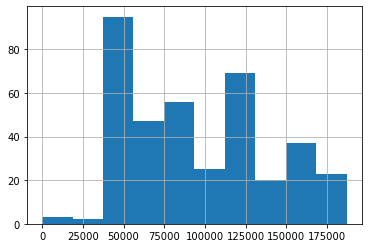

In [556]:
#Visual understanding of how the salaries are distributed
salaries['SALARY'].hist(bins=10)

This shows that there are no outliers


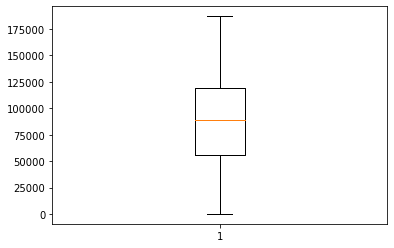

In [557]:
#Finding the outliers visually

plt.boxplot(salaries['SALARY'], showfliers=True)
print("This shows that there are no outliers")

In [558]:
#One Hot Encoding
pd.get_dummies(salaries['STATUS'])

,Detailee,Employee
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
372,0,1
373,0,1
374,0,1
375,0,1


In [559]:
sal = [[s] for s in salaries.SALARY]
temp = StandardScaler().fit_transform(sal)
salaries['SALARY'] = temp

In [560]:
#Standardized the salary => Mean = 0 and standard dev = 1
salaries.describe()

,SALARY
count,3.770000e+02
mean,1.295751e-17
std,1.001329e+00
min,-2.203500e+00
25%,-9.028422e-01
50%,-1.363832e-01
75%,5.603976e-01
max,2.142090e+00


In [561]:
#This implies the data is moderately normally distributed or is almost positively skewed
salaries['SALARY'].skew()

0.45366667026631147

# Q2 part b

In [576]:
file2 = "https://raw.githubusercontent.com/fractalbass/data_engineer/master/data.csv"
data = pd.read_csv(file2, names=['col1','col2'])

In [577]:
data = data.drop(columns=["col1"])

In [579]:
#Descriptive Statistics about this dataset
data.describe()

,col2
count,10000.000000
mean,23.036075
std,2.995296
min,11.248686
25%,21.007801
50%,23.024042
75%,25.069083
max,33.286533


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A56B086E20>]],
      dtype=object)

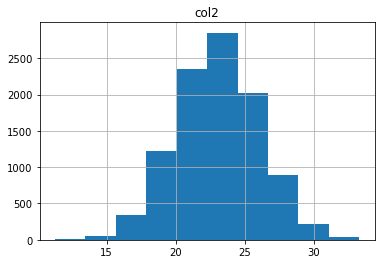

In [583]:
#THIS IS A NORMAL DISTRIBUTION
data.hist()

In [584]:
#IT ALMOST HAS 0 SKEW => IT IS ALMOST PERFCECTLY SYMMETRICAL 
data.skew()

col2    0.000059
dtype: float64